<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_6_Flask_Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!git clone 'https://github.com/vsvale/Flask_Heart_attack.git'

Cloning into 'Flask_Heart_attack'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
df = pd.read_csv('/content/Flask_Heart_attack/doencas_coracao.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Feature                	Explanation                                    	Measurement    	Range              
*   Age: Age of the patient in Years between [40,…, 95]  
*   Anaemia                	Decrease of red blood cells or hemoglobin      	Boolean        	0, 1              
*   High blood pressure    	If a patient has hypertension      	Boolean        	0, 1              
*   Creatinine phosphokinase (CPK)	Level of the CPK enzyme in the blood          	mcg/L          	[23,…, 7861]    
*   Diabetes                	If the patient has diabetes                    	Boolean        	0, 1              
*   Ejection fraction      	Percentage of blood leaving                    	Percentage      	[14,…, 80]      
*   Sex                    	Woman or man                                  	Binary          	0, 1              
*   Platelets              	Platelets in the blood                        	kiloplatelets/mL	[25.01,…, 850.00]
*   Serum creatinine        	Level of creatinine in the blood              	mg/dL          	[0.50,…, 9.40]  
*   Serum sodium            	Level of sodium in the blood                  	mEq/L          	[114,…, 148]    
*   Smoking                	If the patient smokes                          	Boolean        	0, 1              
*   Time                    	Follow-up period        	Days            	[4,…,285]        
*   Death event    	If the patient died during the follow-up period	Boolean        	0, 1          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe().count

<bound method DataFrame.count of               age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]>

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
df.groupby('DEATH_EVENT', as_index=False)['age'].mean()

,DEATH_EVENT,age
0,0,58.761906
1,1,65.215281


In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
normaliza = MinMaxScaler()
entradas_normalizadas=normaliza.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(209, 12)

# KNN

              precision    recall  f1-score   support

           0       0.61      0.96      0.74        53
           1       0.67      0.11      0.19        37

    accuracy                           0.61        90
   macro avg       0.64      0.54      0.47        90
weighted avg       0.63      0.61      0.51        90



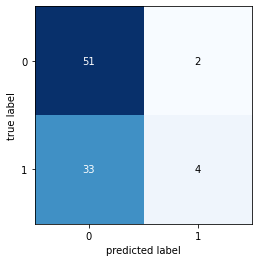

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(x_train,y_train)
y_pred = clf_KNN.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
print(classification_report(y_test,y_pred))
from mlxtend.plotting import plot_confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

#Decision Tree

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



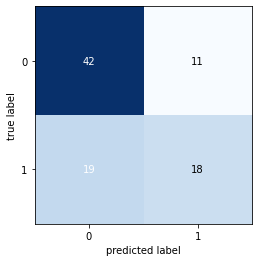

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier(random_state=1)
tree = tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

#MLP

              precision    recall  f1-score   support

           0       0.68      0.96      0.80        53
           1       0.87      0.35      0.50        37

    accuracy                           0.71        90
   macro avg       0.77      0.66      0.65        90
weighted avg       0.76      0.71      0.67        90



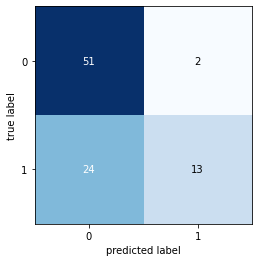

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mp = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,10),random_state=1)
clf_mp = clf_mp.fit(x_train,y_train)
y_pred = clf_mp.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# SVC

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        53
           1       1.00      0.03      0.05        37

    accuracy                           0.60        90
   macro avg       0.80      0.51      0.40        90
weighted avg       0.76      0.60      0.46        90



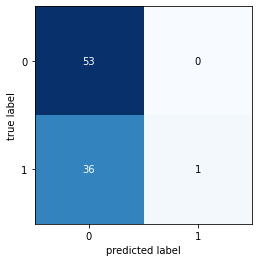

In [ ]:
from sklearn.svm import SVC

clf_svc = SVC(gamma='auto',random_state=1)
clf_svc = clf_svc.fit(x_train,y_train)
y_pred = clf_svc.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# NuSVC

              precision    recall  f1-score   support

           0       0.71      0.91      0.79        53
           1       0.77      0.46      0.58        37

    accuracy                           0.72        90
   macro avg       0.74      0.68      0.68        90
weighted avg       0.73      0.72      0.70        90



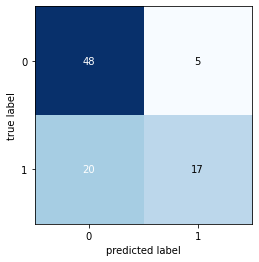

In [ ]:
from sklearn.svm import NuSVC

clf_nusvc = NuSVC(gamma='auto',random_state=1)
clf_nusvc = clf_nusvc.fit(x_train,y_train)
y_pred = clf_nusvc.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Linear SVC

              precision    recall  f1-score   support

           0       0.73      0.92      0.82        53
           1       0.83      0.51      0.63        37

    accuracy                           0.76        90
   macro avg       0.78      0.72      0.72        90
weighted avg       0.77      0.76      0.74        90



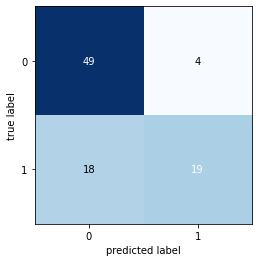

In [ ]:
from sklearn.svm import SVC

clf_svclinear = SVC(kernel="linear",random_state=1)
clf_svclinear = clf_svclinear.fit(x_train,y_train)
y_pred = clf_svclinear.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Gaussian Process

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        53
           1       0.87      0.54      0.67        37

    accuracy                           0.78        90
   macro avg       0.81      0.74      0.75        90
weighted avg       0.80      0.78      0.76        90



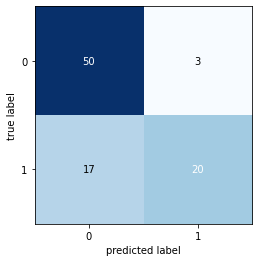

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
clf_gpc = GaussianProcessClassifier(1.0 * RBF(1.0),random_state=1)
clf_gpc = clf_gpc.fit(x_train,y_train)
y_pred = clf_gpc.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        53
           1       0.83      0.54      0.66        37

    accuracy                           0.77        90
   macro avg       0.79      0.73      0.74        90
weighted avg       0.78      0.77      0.75        90



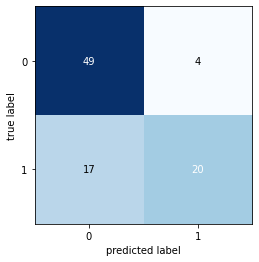

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=1)
clf_rfc = clf_rfc.fit(x_train,y_train)
y_pred = clf_rfc.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Ada Boost

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        53
           1       0.74      0.46      0.57        37

    accuracy                           0.71        90
   macro avg       0.72      0.67      0.68        90
weighted avg       0.72      0.71      0.69        90



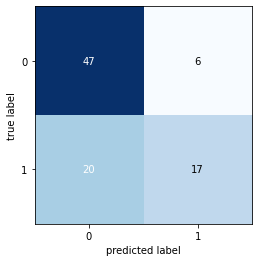

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_abc = AdaBoostClassifier(random_state=1)
clf_abc = clf_abc.fit(x_train,y_train)
y_pred = clf_abc.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Quadratic Discriminant Analysis

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        53
           1       0.75      0.41      0.53        37

    accuracy                           0.70        90
   macro avg       0.72      0.66      0.65        90
weighted avg       0.71      0.70      0.68        90



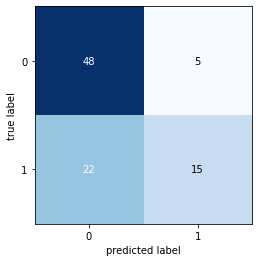

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda = clf_qda.fit(x_train,y_train)
y_pred = clf_qda.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# GaussianNB

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        53
           1       0.79      0.41      0.54        37

    accuracy                           0.71        90
   macro avg       0.74      0.66      0.66        90
weighted avg       0.73      0.71      0.69        90



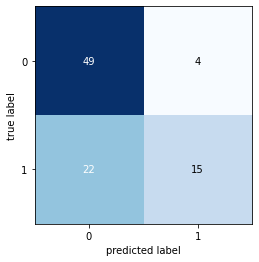

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb = clf_gnb.fit(x_train,y_train)
y_pred = clf_gnb.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Best model

In [ ]:
import joblib
nome_arquivo = 'bestmodel.sav'
joblib.dump(clf_gpc,nome_arquivo)

['bestmodel.sav']

In [ ]:
!pip install flask-ngrok

In [ ]:
import numpy as np
from flask_ngrok import run_with_ngrok
import joblib
from flask import Flask,request,jsonify,render_template
app = Flask(__name__,template_folder='/content/Flask_Heart_attack/templates')
run_with_ngrok(app)   #starts ngrok when the app is run

In [ ]:
def previsao_heart_attack(lista_valores_formulario):
    prever = np.array(lista_valores_formulario).reshape(1,12)
    modelo_salvo = joblib.load('/content/Flask_Heart_attack/bestmodel.sav')
    resultado = modelo_salvo.predict(prever)
    return resultado[0]

In [ ]:
@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
@app.route('/result',methods=['POST'])
def result():
    if request.method=='POST':
        lista_formulario = request.form.to_dict()
        lista_formulario=list(lista_formulario.values())
        lista_formulario=list(map(lambda x : float(x) ,lista_formulario))
        resultado = previsao_heart_attack(lista_formulario)
        if int(resultado)==1:
             previsa='Morte por ataque cardiaco'
        else:
             previsa = 'Vivo e passa bem'
        return render_template('resultado.html',previsao=previsa)

In [ ]:
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://ac1712637a70.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Nov/2020 15:37:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Nov/2020 15:37:04] "GET /favicon.ico HTTP/1.1" 404 -
